In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import statistics

In [29]:
df = pd.read_csv("./dataframe.csv")

In [4]:
df = pd.read_feather("./dataframe.feather")

In [30]:
df.sample(10)


,Number of tuggers,Number of stations,Buffer Size,Average Idle Times[min]
7,0,2,"[3, 3, 3, 3, 3]",862.200000
68,6,2,"[3, 3, 3, 3, 3]",47.230000
130,13,2,"[3, 3, 3, 3, 3]",25.676667
78,7,2,"[3, 3, 3, 3, 3]",39.656667
20,2,2,"[3, 3, 3, 3, 3]",233.173333
146,14,2,"[3, 3, 3, 3, 3]",44.123333
96,9,2,"[3, 3, 3, 3, 3]",19.146667
124,12,2,"[3, 3, 3, 3, 3]",29.856667
2,0,2,"[3, 3, 3, 3, 3]",862.200000
3,0,2,"[3, 3, 3, 3, 3]",862.200000


In [5]:
df_grouped = df.groupby(["Tugger N"]).agg(Idle_1=pd.NamedAgg(column="Idle_time_1", aggfunc=lambda x: max(x)/60),
                                          Idle_2=pd.NamedAgg(column="Idle_time_2", aggfunc=lambda x: max(x)/60),
                                          Idle_3=pd.NamedAgg(column="Idle_time_3", aggfunc=lambda x: max(x)/60),
                                          Idle_4=pd.NamedAgg(column="Idle_time_4", aggfunc=lambda x: max(x)/60),
                                          Idle_5=pd.NamedAgg(column="Idle_time_5", aggfunc=lambda x: max(x)/60),
                                       Sat_1 = pd.NamedAgg(column="Saturation_1", aggfunc=lambda x: sum(x)/len(x)),
                                       Sat_2 = pd.NamedAgg(column="Saturation_2", aggfunc=lambda x: sum(x)/len(x)),
                            )

In [6]:
df_grouped["AVG idle"] = (df_grouped.Idle_1 + df_grouped.Idle_2 + df_grouped.Idle_3 + df_grouped.Idle_4 + df_grouped.Idle_5)/5
df_grouped["AVG charging saturation"] = (df_grouped.Sat_1 + df_grouped.Sat_2)/2

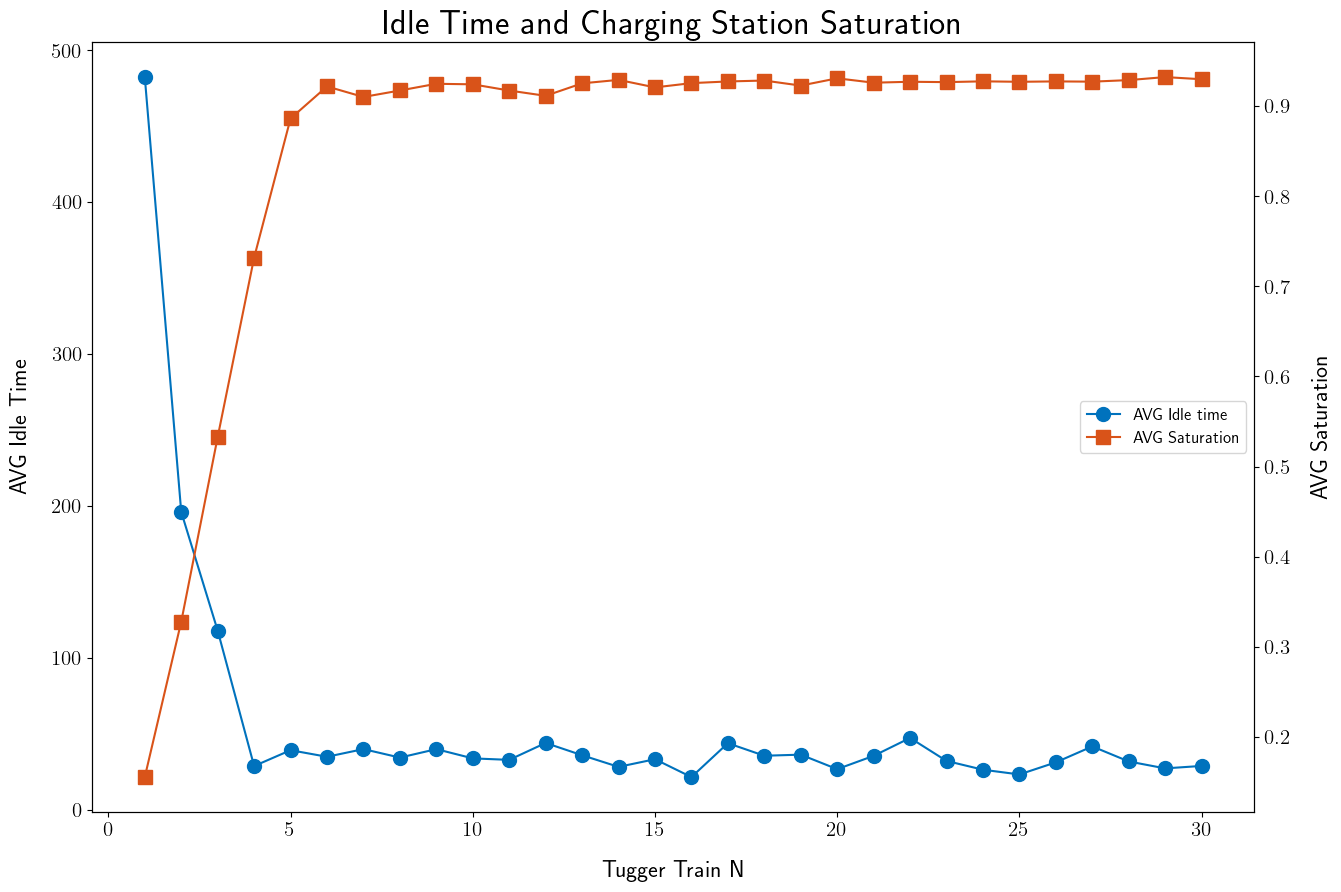

In [7]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("AVG Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

ax2 = ax.twinx()
ax2.set_ylabel("AVG Saturation", fontdict={"fontsize":17}, labelpad = 15)
ax2.tick_params(axis='y', which='major', labelsize=15)

lin1 = ax.plot(df_grouped["AVG idle"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
lin2 = ax2.plot(df_grouped["AVG charging saturation"], color = "#D95319", marker = "s", markersize=10, label = "Saturation of CS")

t = ax.set_title("Idle Time and Charging Station Saturation", fontdict={"fontsize":25})

lns = lin1 + lin2
labs = ["AVG Idle time", "AVG Saturation"]
plt.legend(lns, labs, fontsize=12, loc=5)

fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()

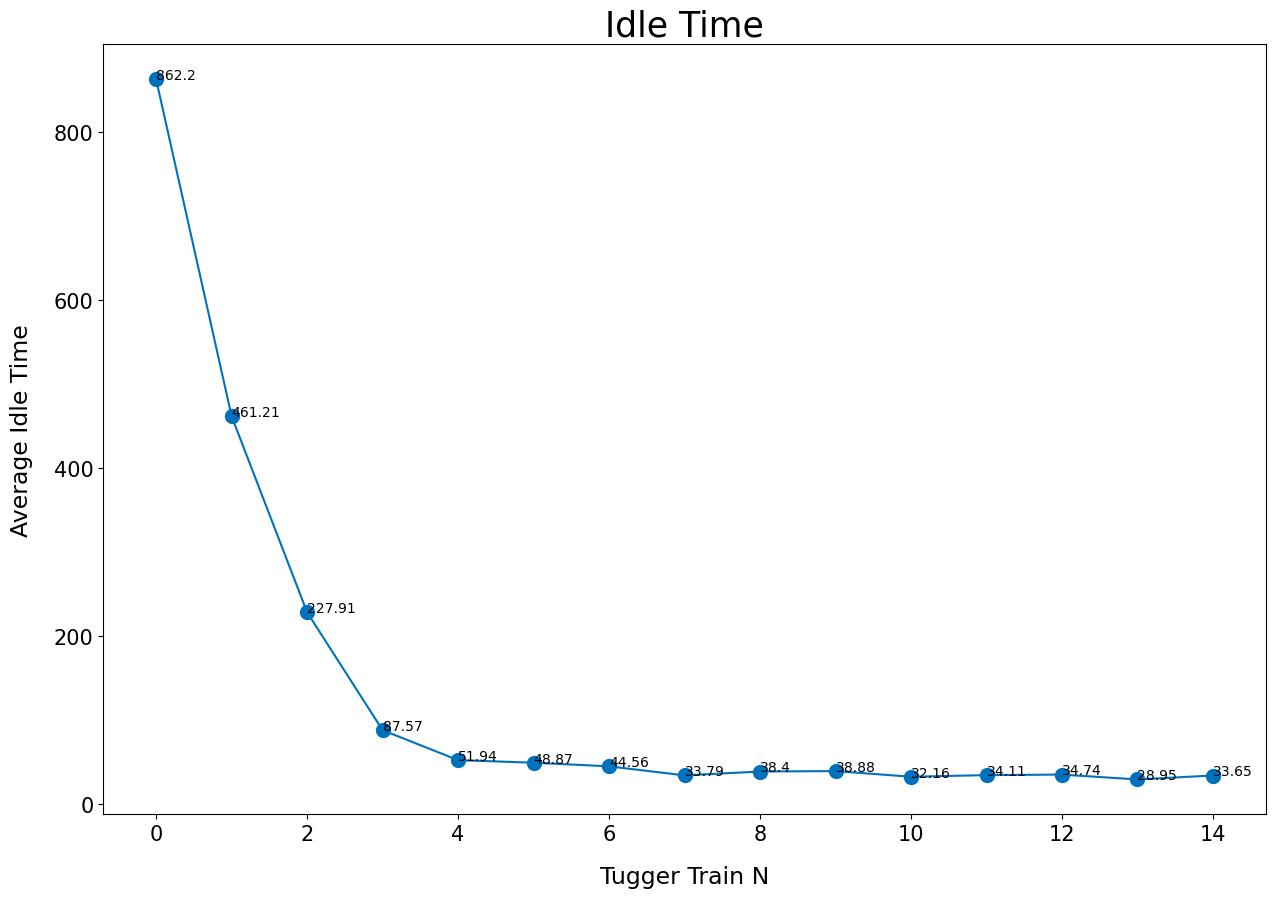

In [35]:
df_grouped
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel("Average Idle Time",  fontdict={"fontsize":17}, labelpad = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Tugger Train N", fontdict={"fontsize":17}, labelpad = 15)

lin1 = ax.plot(df_grouped["Average Idle Times[min]"], label = "Idle time", color = "#0072BD", marker = "o", markersize=10)
for i, txt in enumerate(df_grouped["Average Idle Times[min]"]):
    ax.annotate(round(txt,2), (i, df_grouped["Average Idle Times[min]"][i]))

t = ax.set_title("Idle Time", fontdict={"fontsize":25})
fig.savefig("./images/idle_sat_tugger.png", dpi = 150)
plt.show()

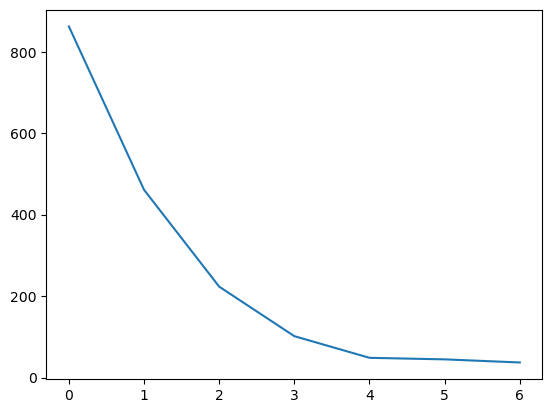

In [27]:
plt.plot(df_grouped["Average Idle Times[min]"])

In [31]:
df_grouped = df[["Number of tuggers","Average Idle Times[min]"]]

In [32]:
df_grouped = df_grouped.groupby(["Number of tuggers"]).mean()


In [16]:
import matplotlib.pyplot as plt
p = []
with open("../mean.txt", "r") as f:
    for i in f.readlines():
        p.append(float(i))

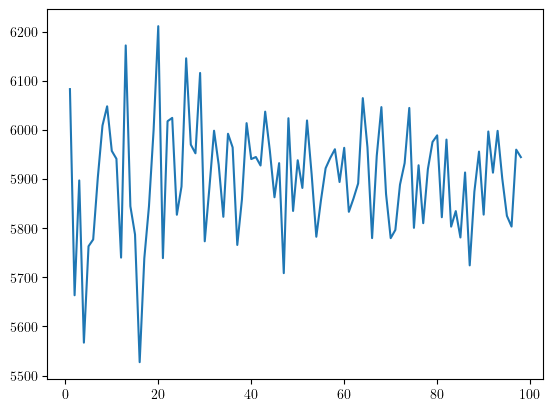

In [17]:
plt.plot([i for i in range(1,len(p)+1)], p)
plt.show()